# IMPALA Results

In [1]:
import sys
sys.path.insert(0, "../")
from  Utils.plot import plot_IMPALA_session
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import pandas as pd

## Loading metadata

In [2]:
def find_xpid_from_mapname(map_name, load_dir='../logs/torchbeast'):
    all_files = os.listdir(load_dir)
    xpid_files = [f for f in all_files if 'torchbeast' in f]
    matching_xpids = []
    for xpid in xpid_files:
        with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
            data = json.load(json_file)
            flags = data['args']
        if flags['map_name'] == map_name:
            print("Matchig xpid: ", xpid)
            print("Map name: ", flags['map_name'])
            print("Batch size: ", flags['batch_size'])
            print("Total steps: ", flags['total_steps'],'\n')
            matching_xpids.append(xpid)
    return matching_xpids

In [3]:
# search for xpids starting from the map name
game_names = {1:'MoveToBeacon',
              2:'CollectMineralShards',
              3:'DefeatRoaches',
              4:'FindAndDefeatZerglings',
              5:'DefeatZerglingsAndBanelings',
              6:'CollectMineralsAndGas',
              7:'BuildMarines'
              }
map_name = game_names[2]
matching_xpids = find_xpid_from_mapname(map_name)
matching_xpids

Matchig xpid:  torchbeast-20200803-172924
Map name:  CollectMineralShards
Batch size:  60
Total steps:  240000 

Matchig xpid:  torchbeast-20200727-113227
Map name:  CollectMineralShards
Batch size:  40
Total steps:  3600000 

Matchig xpid:  torchbeast-20200805-172157
Map name:  CollectMineralShards
Batch size:  20
Total steps:  240000 

Matchig xpid:  torchbeast-20200803-183002
Map name:  CollectMineralShards
Batch size:  60
Total steps:  240000 

Matchig xpid:  torchbeast-20200803-165741
Map name:  CollectMineralShards
Batch size:  60
Total steps:  240000 

Matchig xpid:  torchbeast-20200803-143954
Map name:  CollectMineralShards
Batch size:  20
Total steps:  240000 

Matchig xpid:  torchbeast-20200804-132417
Map name:  CollectMineralShards
Batch size:  20
Total steps:  240000 

Matchig xpid:  torchbeast-20200803-160908
Map name:  CollectMineralShards
Batch size:  60
Total steps:  240000 

Matchig xpid:  torchbeast-20200803-152318
Map name:  CollectMineralShards
Batch size:  20
Total

['torchbeast-20200803-172924',
 'torchbeast-20200727-113227',
 'torchbeast-20200805-172157',
 'torchbeast-20200803-183002',
 'torchbeast-20200803-165741',
 'torchbeast-20200803-143954',
 'torchbeast-20200804-132417',
 'torchbeast-20200803-160908',
 'torchbeast-20200803-152318',
 'torchbeast-20200724-153342',
 'torchbeast-20200803-155749',
 'torchbeast-20200725-204918',
 'torchbeast-20200803-171349',
 'torchbeast-20200803-145104']

In [65]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200731"
hms = "183523"
load_dir = "../logs/torchbeast"
#xpid = 'torchbeast-%s-%s'%(ymd,hms)
xpid = "CollectMineralShardsAdam2"
#xpid = "FindAndDefeatZerglingsAdam2"
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [66]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  CollectMineralShards
Batch size:  20
Total steps:  6000000
Learning rate:  0.0003
Entropy cost:  0.0005


## Loading logs

In [67]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)

In [68]:
logs = logs[logs['mean_episode_return'].notna()]

In [69]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
3,3,1.597676e+09,180,-1938.708374,17.400000,-2020.828369,82.257118,-0.137100
7,7,1.597676e+09,420,-40814.550781,13.650001,-44290.132812,3475.768311,-0.186035
11,11,1.597676e+09,660,-35630.503906,16.600000,-38232.562500,2602.252930,-0.194121
15,15,1.597676e+09,900,-31090.789062,17.900000,-33154.929688,2064.330566,-0.189127
19,19,1.597676e+09,1140,-16228.071289,19.550001,-17319.187500,1091.305664,-0.189661
...,...,...,...,...,...,...,...,...
67739,67739,1.597735e+09,4064340,376.716064,92.333336,-548.527344,925.243408,0.000000
67740,67740,1.597735e+09,4064400,-96.467896,79.833336,-784.059265,687.591370,0.000000
67741,67741,1.597735e+09,4064460,687.850464,85.500000,-405.557495,1093.407959,0.000000
67742,67742,1.597735e+09,4064520,352.763855,93.666664,-266.422180,619.186035,0.000000


In [70]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

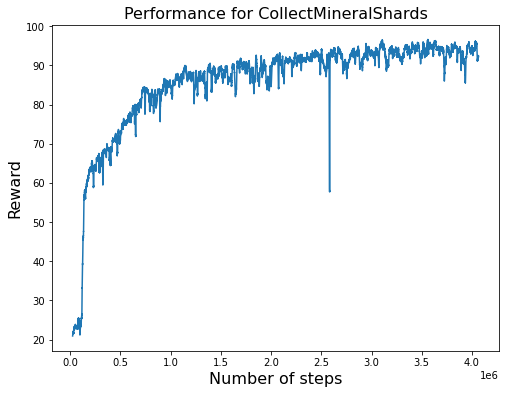

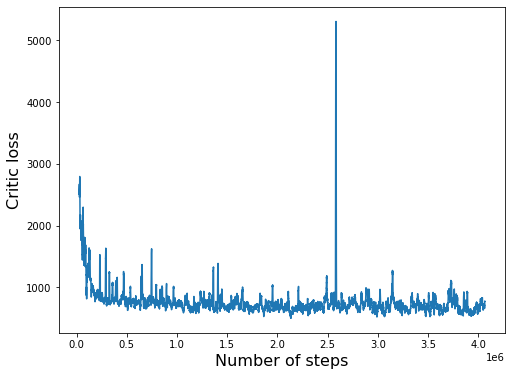

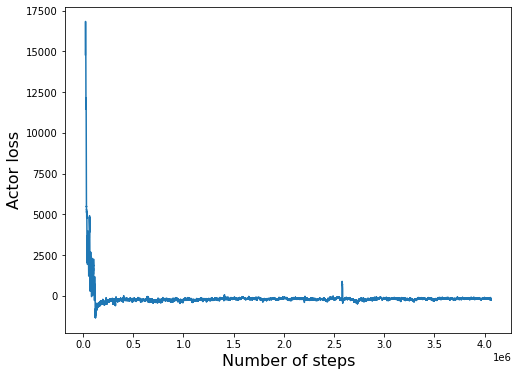

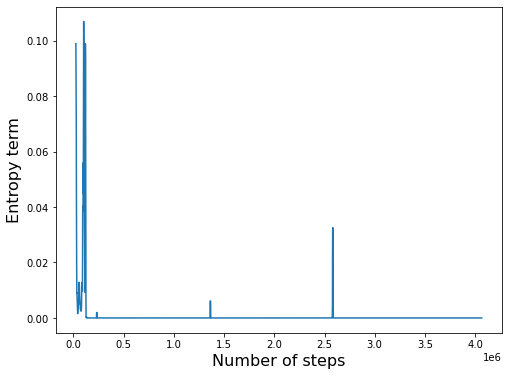

In [71]:
plot_IMPALA_session(results, map_name=flags['map_name'], moving_average=True, average_window=100)

In [72]:
print("Average asymptotic reward: %.2f"%score[-100:].mean())

Average asymptotic reward: 92.26


# Search for periodic peaks in the critic loss

In [179]:
threshold = 4000
mask = (baseline_loss > threshold)
non_zero = mask.nonzero()[0]
tolerance = 30
x_min = non_zero[0]
centers = []
clusters = []
cluster_elems = []
for i in range(len(non_zero)):
    if (non_zero[i] - x_min) <= tolerance:
        cluster_elems.append(non_zero[i])
    else:
        clusters.append(cluster_elems)
        centers.append(np.mean(cluster_elems))
        cluster_elems = [non_zero[i]]
        x_min = non_zero[i]
        
centers = np.array(centers)
print("Clusters: \n", clusters, '\n')
print("Centers: \n", centers)

Clusters: 
 [[31, 32, 34, 37, 43, 49, 61], [67, 73, 79, 91, 97], [103, 130], [136, 142, 148, 154], [220, 226, 232, 238, 247, 250], [256, 265, 271, 277, 283], [289, 313], [322, 337], [355, 361, 367, 373, 385], [391, 403, 406], [470]] 

Centers: 
 [ 41.   81.4 116.5 145.  235.5 270.4 301.  329.5 368.2 400.  470. ]


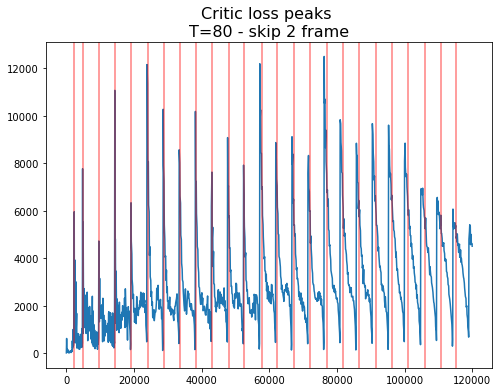

In [157]:
plt.figure(figsize = (8,6))
plt.title("Critic loss peaks \nT=80 - skip 2 frame", fontsize=16)
plt.plot(steps, baseline_loss)
T = flags['unroll_length']
for c in centers:
    plt.axvline(steps[int(c)], color='r', alpha=0.5)

In [156]:
distances = centers[1:] - centers[:-1] # measured in number of updates
# mask out outliers
mean = distances.mean()
std = distances.std()
mask = np.abs(distances - mean) > 3*std
print("Distances between centers: ", distances)
print("Outlier: ", mask)
distances = distances[~mask]
print("Filtered distances: ", distances)
print("Mean distance: %.2f +/- %.2f"%(distances.mean(), distances.std()/np.sqrt(len(distances)) ))

Distances between centers:  [32.         59.         60.         49.         42.5        40.5
 39.5        41.5        39.2        41.8        39.5        44.08333333
 38.41666667 41.5        40.         44.         40.         40.5
 41.         42.5        40.05       41.45       39.5        41.        ]
Outlier:  [False False False False False False False False False False False False
 False False False False False False False False False False False False]
Filtered distances:  [32.         59.         60.         49.         42.5        40.5
 39.5        41.5        39.2        41.8        39.5        44.08333333
 38.41666667 41.5        40.         44.         40.         40.5
 41.         42.5        40.05       41.45       39.5        41.        ]
Mean distance: 42.44 +/- 1.20


T = 80 -> mean distance 81.10 <br>
T = 60 -> mean distance 65.10; 60 (outlier manually counted off)

# MoveToBeacon

Target score: 26 (DeepMind)

In [4]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200727"
hms = "113216"
load_dir = "../logs/torchbeast"
xpid = 'torchbeast-%s-%s'%(ymd,hms)
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [5]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  MoveToBeacon
Batch size:  40
Total steps:  120000
Learning rate:  0.0007
Entropy cost:  0.001


In [6]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)
logs = logs[logs['mean_episode_return'].notna()]

In [7]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.595839e+09,0,1499.545532,0.000000,1466.273071,33.874214,-0.601849
1,1,1.595839e+09,60,-5738.138672,0.850000,-5828.133789,90.608040,-0.612637
3,3,1.595839e+09,180,-1795.953979,0.950000,-1857.742920,62.401550,-0.612698
5,5,1.595839e+09,300,149.728806,1.100000,107.573318,42.757256,-0.601759
7,7,1.595839e+09,420,443.243835,0.750000,406.204895,37.666275,-0.627312
...,...,...,...,...,...,...,...,...
1991,1991,1.595842e+09,119460,4302.445312,22.800001,-385.087494,4687.887695,-0.355162
1993,1993,1.595842e+09,119580,3690.619385,22.700001,-756.169739,4447.192871,-0.403908
1995,1995,1.595842e+09,119700,3497.805176,23.050001,-616.551392,4114.785156,-0.428634
1997,1997,1.595842e+09,119820,3404.897705,22.900000,-629.038635,4034.390137,-0.453797


In [8]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

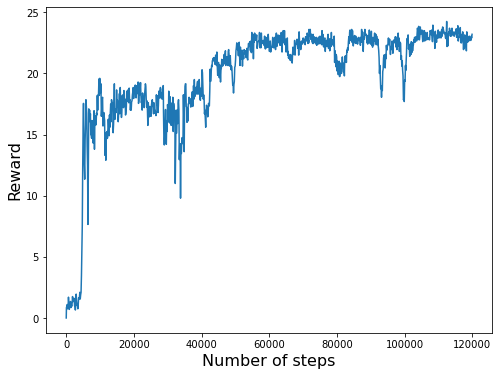

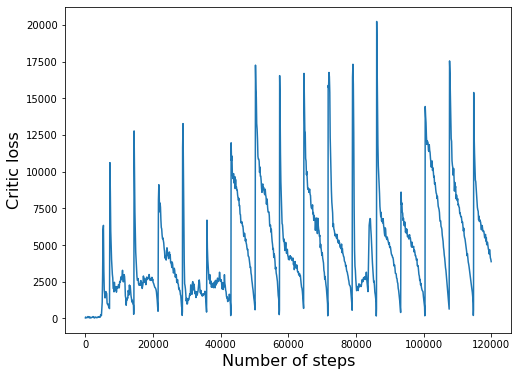

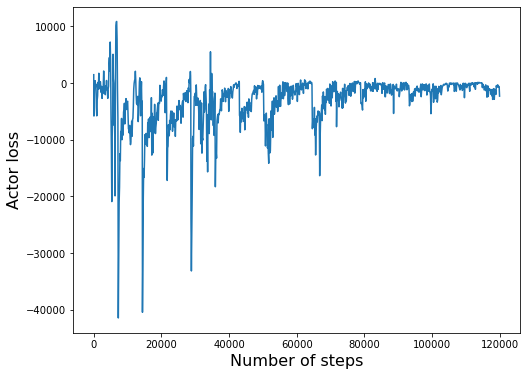

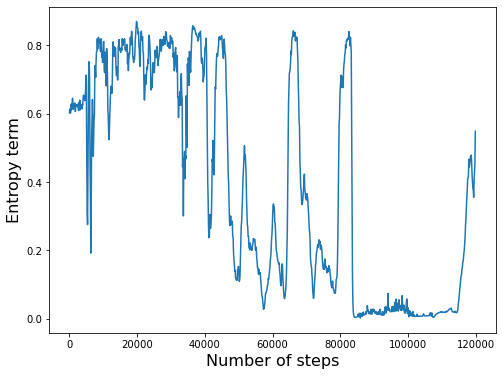

In [9]:
plot_IMPALA_session(results, moving_average=False, average_window=10)

In [10]:
print("Average asymptotic reward: %.2f"%score[-100:].mean())

Average asymptotic reward: 23.06


# CollectMineralShards

Target score: 103 (DeepMind)

In [89]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200727"
hms = "113227"
load_dir = "../logs/torchbeast"
#xpid = 'torchbeast-%s-%s'%(ymd,hms)
xpid = 'CollectMineralShards4'
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

1: 97.93 (std 6.43) <br>


In [90]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  CollectMineralShards
Batch size:  20
Total steps:  6000000
Learning rate:  0.0003
Entropy cost:  0.0005


In [91]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)
logs = logs[logs['mean_episode_return'].notna()]

In [92]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
3,3,1.596930e+09,180,-1350.356812,16.000000,-1375.550537,25.314150,-0.120520
7,7,1.596930e+09,420,-7800.646973,14.700000,-8290.546875,490.090485,-0.190203
11,11,1.596930e+09,660,-9823.893555,15.950000,-10357.738281,534.024414,-0.179472
15,15,1.596930e+09,900,-7375.843750,16.900000,-7739.853516,364.169495,-0.159574
19,19,1.596930e+09,1140,-8540.927734,17.050001,-8867.724609,326.993469,-0.196545
...,...,...,...,...,...,...,...,...
99996,99996,1.597014e+09,5999760,24.146435,93.250000,-489.619263,513.769348,-0.003651
99997,99997,1.597014e+09,5999820,764.732117,94.142860,-185.572601,950.308472,-0.003731
99998,99998,1.597014e+09,5999880,1048.943359,92.800003,114.217987,934.728394,-0.003059
99999,99999,1.597014e+09,5999940,871.865479,94.250000,-255.252533,1127.121948,-0.003888


In [93]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

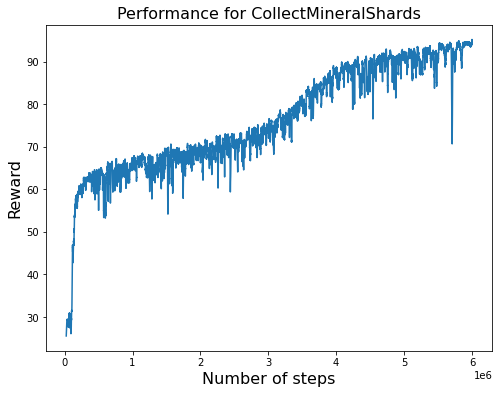

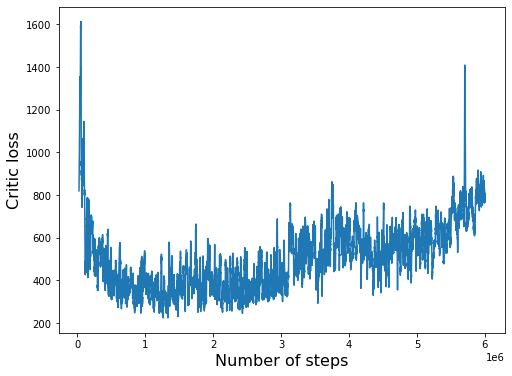

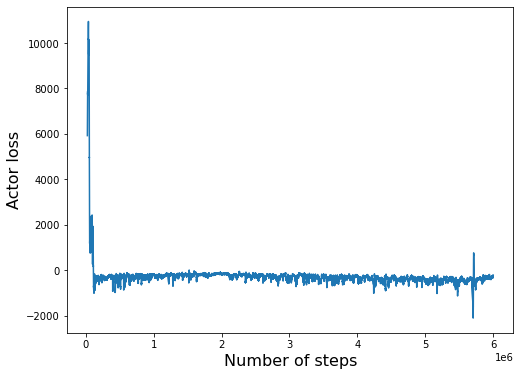

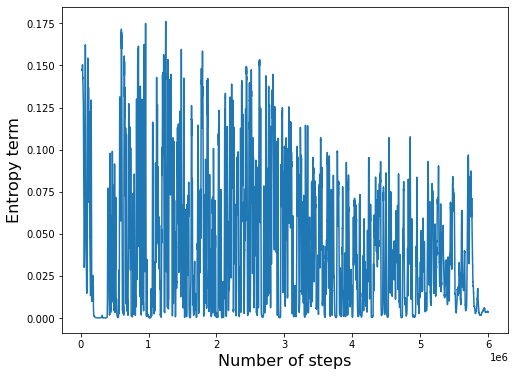

In [94]:
plot_IMPALA_session(results, flags['map_name'], moving_average=True, average_window=100)

In [144]:
print("Average asymptotic reward: %.2f"%score[-1000:].mean())

Average asymptotic reward: 98.91


### Plotting n runs

In [2]:
n_runs = 5
map_name = 'CollectMineralShards'
xpid = map_name+'%s'
load_dir = "../logs/torchbeast"
returns = []
steps = []
pg_losses = []
baseline_losses = []
entropy_losses = []
for n in range(1,n_runs+1):
    nth_xpid = xpid%n
    logfile = "%s/%s/logs.csv"%(load_dir,nth_xpid)
    logs = pd.read_csv(logfile)
    logs = logs[logs['mean_episode_return'].notna()]
    returns.append(np.array(logs['mean_episode_return']))
    steps.append(np.array(logs['step']))
    pg_losses.append(np.array(logs['pg_loss']))
    baseline_losses.append(np.array(logs['baseline_loss']))
    entropy_losses.append(np.array(logs['entropy_loss']))

In [3]:
test_means = []
test_devs = []
for n in range(1,n_runs+1):
    nth_xpid = xpid%n
    path = '%s/%s/test_results.npy'%(load_dir,nth_xpid)
    test_result = np.load(path)
    test_means.append(test_result.mean())
    test_devs.append(test_result.std()/np.sqrt(len(test_result))) # error of the mean
test_means = np.array(test_means)
test_devs = np.array(test_devs)
best_idx = np.argmax(test_means)
print("Best run: %d - Average return: %.2f +/- %.2f"%(best_idx+1, test_means[best_idx], test_devs[best_idx]))

Best run: 1 - Average return: 98.51 +/- 0.85


In [4]:
def plot_n_runs(steps, returns, best_idx, map_name, moving_average=True, average_window=100, alpha=0.3):
    plt.figure(figsize=(8,6))
    for n in range(n_runs):
        if moving_average:
            n_epochs = steps[n][average_window:]
        else:
            n_epochs = steps[n]

        if moving_average:
            score = np.array([np.mean(returns[n][i:i+average_window]) for i in range(len(n_epochs))])
        else:
            score = returns[n]

        if n == best_idx:
            plt.plot(n_epochs, score, alpha = 1)
        else:
            plt.plot(n_epochs, score, alpha = 0.3)

    plt.title("Performance for %s"%map_name, fontsize=16)
    plt.xlabel("Number of steps", fontsize=16)
    plt.ylabel("Total reward per episode", fontsize=16)
    plt.show()

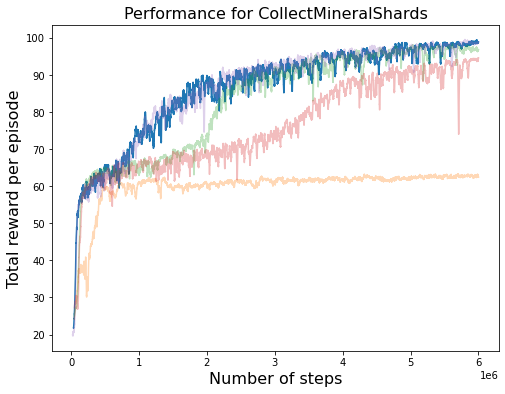

In [6]:
plot_n_runs(steps, returns, best_idx, map_name, average_window=200)

# FindAndDefeatZerglings

Target score: 45 (DeepMind)

In [129]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200727"
hms = "113241"
load_dir = "../logs/torchbeast"
#xpid = 'torchbeast-%s-%s'%(ymd,hms)
xpid = 'FindAndDefeatZerglings5'
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [130]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  FindAndDefeatZerglings
Batch size:  20
Total steps:  6000000
Learning rate:  0.0003
Entropy cost:  0.0005


In [131]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)
logs = logs[logs['mean_episode_return'].notna()]

In [132]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.597011e+09,0,2139.039551,0.071429,1808.356079,330.832489,-1.489109e-01
1,1,1.597011e+09,60,416.084900,1.333333,325.035767,91.199387,-1.502670e-01
2,2,1.597011e+09,120,-1336.743164,3.500000,-1404.807861,68.202957,-1.382488e-01
3,3,1.597011e+09,180,461.186096,1.666667,429.809570,31.518248,-1.417203e-01
4,4,1.597011e+09,240,-2768.790771,4.666667,-2925.872070,157.237671,-1.565683e-01
...,...,...,...,...,...,...,...,...
99995,99995,1.597101e+09,5999700,1624.561523,40.250000,240.926041,1383.636597,-1.104875e-03
99996,99996,1.597101e+09,5999760,-961.481995,44.625000,-2343.387451,1381.906006,-5.677417e-04
99997,99997,1.597101e+09,5999820,158.688110,42.400002,-706.565552,865.253662,-7.152551e-09
99998,99998,1.597101e+09,5999880,786.643677,33.500000,57.156078,729.487610,-1.430510e-09


In [133]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

In [134]:
pg_loss[-100000:].mean()

-65.84253232391427

In [135]:
entropy_loss[-100000:].mean()

-0.0018956043853907128

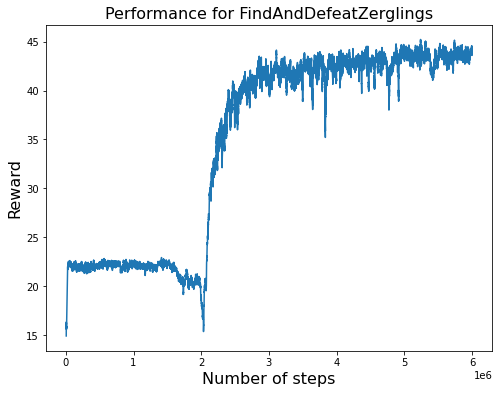

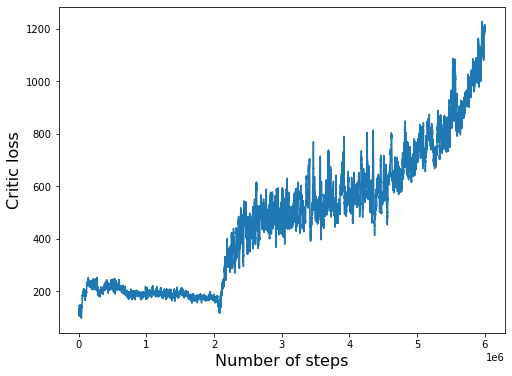

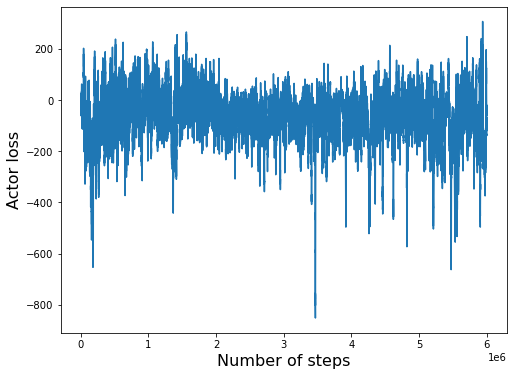

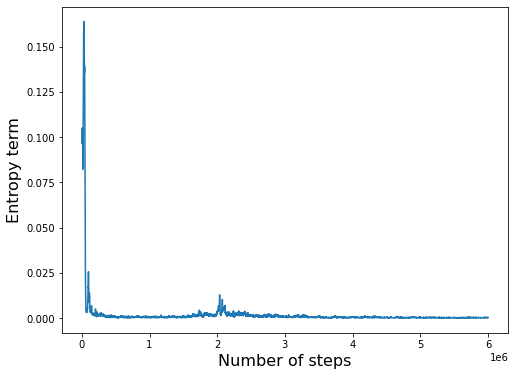

In [136]:
plot_IMPALA_session(results, flags['map_name'], moving_average=True, average_window=100)

In [137]:
print("Average asymptotic reward: %.2f"%score[-100:].mean())

Average asymptotic reward: 43.86


### Plotting n runs

In [7]:
n_runs = 5
map_name = 'FindAndDefeatZerglings'
xpid = map_name+'%s'
load_dir = "../logs/torchbeast"
returns = []
steps = []
pg_losses = []
baseline_losses = []
entropy_losses = []
for n in range(1,n_runs+1):
    nth_xpid = xpid%n
    logfile = "%s/%s/logs.csv"%(load_dir,nth_xpid)
    logs = pd.read_csv(logfile)
    logs = logs[logs['mean_episode_return'].notna()]
    returns.append(np.array(logs['mean_episode_return']))
    steps.append(np.array(logs['step']))
    pg_losses.append(np.array(logs['pg_loss']))
    baseline_losses.append(np.array(logs['baseline_loss']))
    entropy_losses.append(np.array(logs['entropy_loss']))

In [8]:
test_means = []
test_devs = []
for n in range(1,n_runs+1):
    nth_xpid = xpid%n
    path = '%s/%s/test_results.npy'%(load_dir,nth_xpid)
    test_result = np.load(path)
    test_means.append(test_result.mean())
    test_devs.append(test_result.std()/np.sqrt(len(test_result))) # error of the mean
test_means = np.array(test_means)
test_devs = np.array(test_devs)
best_idx = np.argmax(test_means)
print("Best run: %d - Average return: %.2f +/- %.2f"%(best_idx+1, test_means[best_idx], test_devs[best_idx]))

Best run: 3 - Average return: 46.40 +/- 0.63


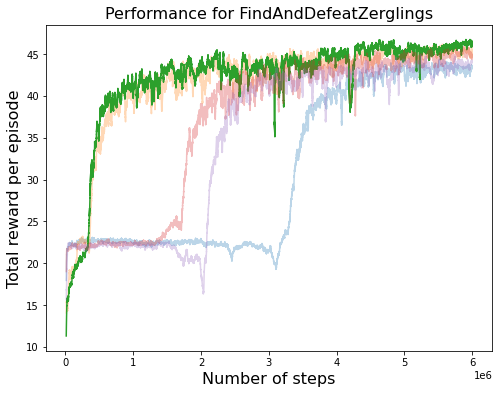

In [9]:
plot_n_runs(steps, returns, best_idx, map_name, average_window=200)

# DefeatRoaches
Target: 100

In [46]:
load_dir = "../logs/torchbeast"
xpid = 'DefeatRoaches1'
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [47]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  DefeatRoaches
Batch size:  20
Total steps:  16000000
Learning rate:  0.0003
Entropy cost:  0.0005


In [48]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)
logs = logs[logs['mean_episode_return'].notna()]

In [49]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.597090e+09,0,-9631.868164,2.250000,-10266.217773,6.344993e+02,-0.149288
1,1,1.597090e+09,60,-2730.384766,4.684211,-2822.673340,9.243121e+01,-0.142494
2,2,1.597090e+09,120,2213.054199,2.578947,2174.023926,3.914048e+01,-0.110044
3,3,1.597090e+09,180,-1932.741821,-1.631579,-1985.074463,5.247765e+01,-0.145009
4,4,1.597090e+09,240,9326.612305,-2.000000,9035.373047,2.914087e+02,-0.169186
...,...,...,...,...,...,...,...,...
255038,255038,1.597327e+09,15302280,-0.311616,0.000000,-0.088233,1.054512e-07,-0.223383
255039,255039,1.597327e+09,15302340,-0.117745,0.000000,0.105639,1.088668e-07,-0.223384
255040,255040,1.597327e+09,15302400,-0.315667,0.000000,-0.092651,1.067797e-07,-0.223016
255041,255041,1.597327e+09,15302460,-0.147354,0.000000,0.076024,1.860021e-07,-0.223378


In [50]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

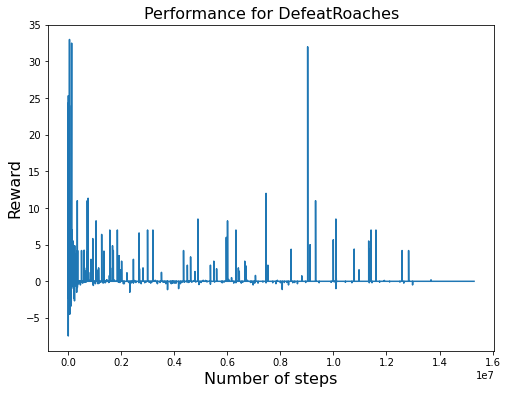

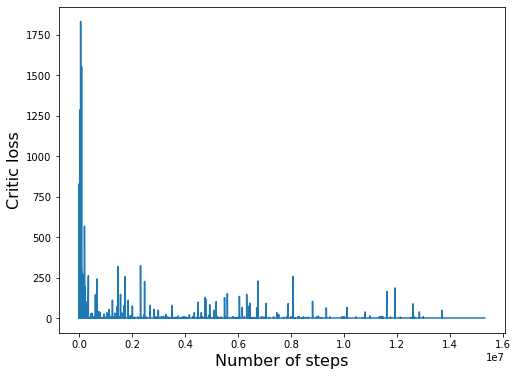

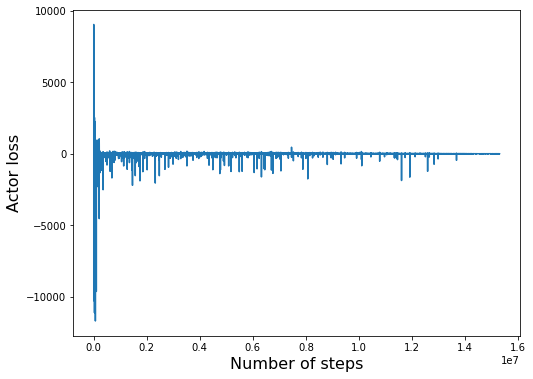

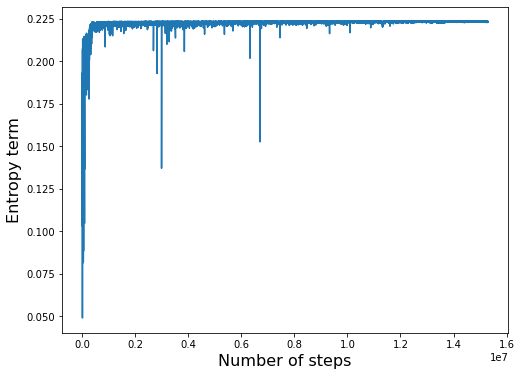

In [52]:
plot_IMPALA_session(results, flags['map_name'], moving_average=False, average_window=100)

# DefeatZerglingsAndBanelings
Target: 62

In [54]:
load_dir = "../logs/torchbeast"
xpid = 'DefeatZerglingsAndBanelings1'
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [55]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  DefeatZerglingsAndBanelings
Batch size:  20
Total steps:  16000000
Learning rate:  0.0003
Entropy cost:  0.0005


In [56]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)
logs = logs[logs['mean_episode_return'].notna()]

In [57]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.597090e+09,0,9962.647461,17.962963,9335.957031,626.840271,-0.149251
1,1,1.597090e+09,60,-1784.102173,15.379311,-1920.565552,136.603104,-0.139726
2,2,1.597090e+09,120,4871.278809,27.344828,4540.114746,331.312805,-0.148970
3,3,1.597090e+09,180,-1396.099731,19.291668,-1503.939087,107.972282,-0.132904
4,4,1.597090e+09,240,4021.976318,22.130436,3379.052734,643.079041,-0.155416
...,...,...,...,...,...,...,...,...
184219,184219,1.597327e+09,11053140,4493.714844,61.428574,2867.103516,1626.611328,-0.000027
184220,184220,1.597327e+09,11053200,1506.005127,56.147060,336.042786,1169.962402,-0.000055
184221,184221,1.597327e+09,11053260,3065.896484,60.741932,2278.614258,787.282227,-0.000040
184222,184222,1.597327e+09,11053320,1641.292969,56.870968,-86.014984,1727.307983,-0.000036


In [58]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

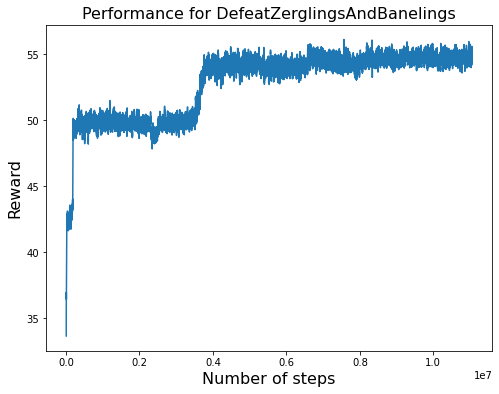

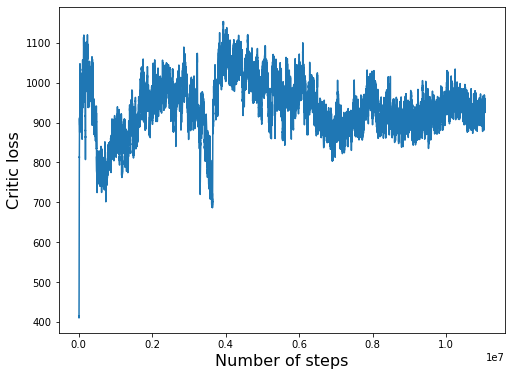

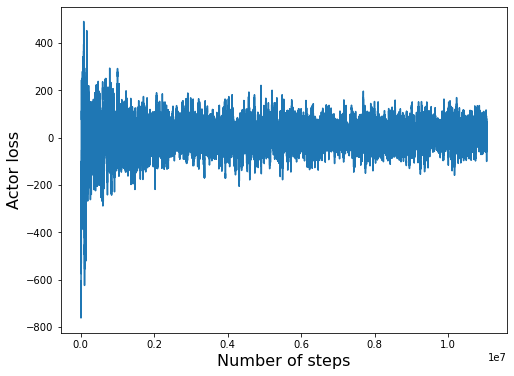

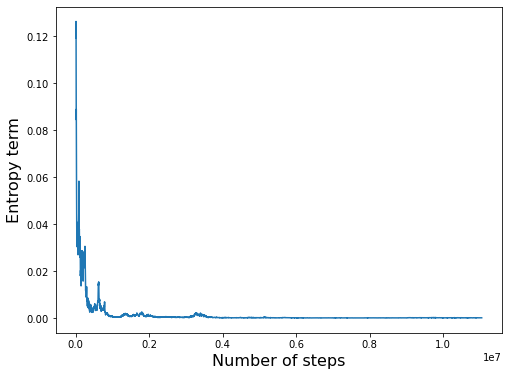

In [60]:
plot_IMPALA_session(results, flags['map_name'], moving_average=True, average_window=100)

In [64]:
print("Asymptotic score: %.2f"%score[-100:].mean())

Asymptotic score: 54.43
